# Problem 1: Machine Learning Setting (20 points)
##### Answer each question with 3-4 sentences. Make sure you fully explain your answer and back it with evidence.


#### a. What is 'overfitting', and how can you avoid It?

Overfitting, in Machine Learning, happens when the model performs well on the training data, but it does not generalize well.  This typically happens when the training set is too noisy, or if it is too small.  When this happens, the model will detect patterns in the noise that have no reason being in the model to begin with.  

If I was building a model that was attempting to predict pitcher injury in major league baseball, I would need to be careful what information I fed into the model.  Giving uniformative attributes can cause a complex model to detect patterns that cannot be confidently generalized to all of the data.  For instance, if player's names are given to the model, it could detect that players with shorter names are more likely to spend longer on the disabled list.  While there is evidence of a pattern, the pattern itself is there purely by chance.  The model, however, cannot determine if the pattern is real or a product of the noise.

This can be fixed by simplifying the model (selecting a simpler algorithm, reducing the number of parameters or features used, or regularinzing the model), gathering more training data, and/or reducing the noise in the training data.

#### b. What is ‘training set’ and ‘test set’ in a machine learning model? How much data will you allocate for your training, validation, and test sets?

The 'training' and 'test' sets are your data split into two groups.  The training set allows you to 'train' your model.  After you have 'trained' your model, you want to evaluate your model using the test set to get an estimate on the error rate on new cases (called the generalization error).  By dividing your data into two sets, and getting the generalization error, you know how well your model will perform on instances that it has never seen before.

Commonly, 80% of your data is used for the training set, while the remainder is held out for the test set.  In reality, it all depends on how large the dataset is.  A model with 10 millions instances, with a holdout of 1%, means that you can have a test set of 100,000 instances.  This is probably enough for a good estimate of the generalization error.



#### c. What is the purpose of a validation set?

Validation sets are additional hold outs of the training set which allow you to compare models.  A validation set makes it possible to select the best model and tune the hyperparameters.

#### d. Explain how a ROC curve works.

The ROC curve plots the true positive rate (recall) against the false positive rate (the ratio of negative instances that are classified as positive).  Specifically, it shows the trade off between sensitivity and specificty.  The area under the ROC curve measures the usefulness of a test in general.  The greater the area (closer to 1), means a more useful test.

#### e. Suppose we want to use an automatic classification system to differentiate between COVID-19 negative (Negative class) and Covid-19 positive (Positive class). We have evaluated two pattern classification systems and the data obtained is given below:
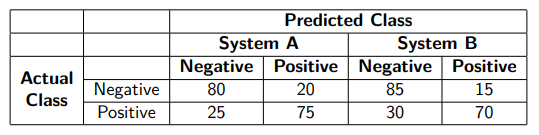

#### i. Determine the number of False Positives(FP) and False Negatives(FN) for both systems.

System A has 20 FP and 25 FN


System B has 15 FP and 30 FN

#### ii. Determine the Sensitivity and Specificity for System A.

Sensitivity = TPR = TP/(TP+FN) = 75/(75+25) = 0.75

Specificity = TNR + TN/(TN+FP) = 80/(80+20) = 0.80

#### iii. Which system should we use to rule out the presence of COVID-19?

We would use System A.  To rule out the presence of COVID-19, we want to minimize the number of false negatives.

# Problem 2: End-top-End Machine Learning Project: Predicting Number of Upvotes(50 points)

##### This exercise is similar to the End-to-End Machine Learning Project (02 end to end machine learning project.ipynb on Canvas) with a few adjustments. I will ask you to manipulate the data in certain ways and run a machine learning algorithm. Specifically, you will:

#### a. Load the upvotes.csv data set.

In [3]:
# Common imports
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# change working directory
os.chdir("C:\\Users\gowgi\Desktop\pandas")
os.getcwd()

# load the dataset
upvotes = pd.read_csv('upvotes.csv')

# preview first 5 lines
upvotes.describe()

,ID,Reputation,Answers,Username,Views,Upvotes
count,330045.000000,3.300450e+05,330045.000000,330045.000000,3.300450e+05,330045.000000
mean,235748.682789,7.773147e+03,3.917672,81442.888803,2.964507e+04,337.505358
std,136039.418471,2.706141e+04,3.579515,49215.100730,8.095646e+04,3592.441135
min,1.000000,0.000000e+00,0.000000,0.000000,9.000000e+00,0.000000
25%,117909.000000,2.820000e+02,2.000000,39808.000000,2.594000e+03,8.000000
50%,235699.000000,1.236000e+03,3.000000,79010.000000,8.954000e+03,28.000000
75%,353620.000000,5.118000e+03,5.000000,122559.000000,2.687000e+04,107.000000
max,471493.000000,1.042428e+06,76.000000,175738.000000,5.231058e+06,615278.000000


#### b. Remove Usernames that appear less than 80 times in the dataset. You can use pandas.core.groupby.DataFrameGroupBy.transform function for this purpose.


In [4]:
upvotes.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [5]:
# drop usernames that appear less than 80 times in the dataset
username_count = upvotes.groupby('Username')['Username'].transform(len)
mask = (username_count >= 80)
upvotes = upvotes[mask]

# check that they are all greater than or equal to 80

# display Username Value Counts
upvotes.Username.value_counts(ascending = True).head(5) # all are greater than (or equal) to 80

150637    80
105139    80
40175     80
60830     80
36805     80
Name: Username, dtype: int64

#### c. Show correlation between features. Use seaborn.heatmap() or seaborn.pairplot() function. Discuss the result in 1-2 sentences.


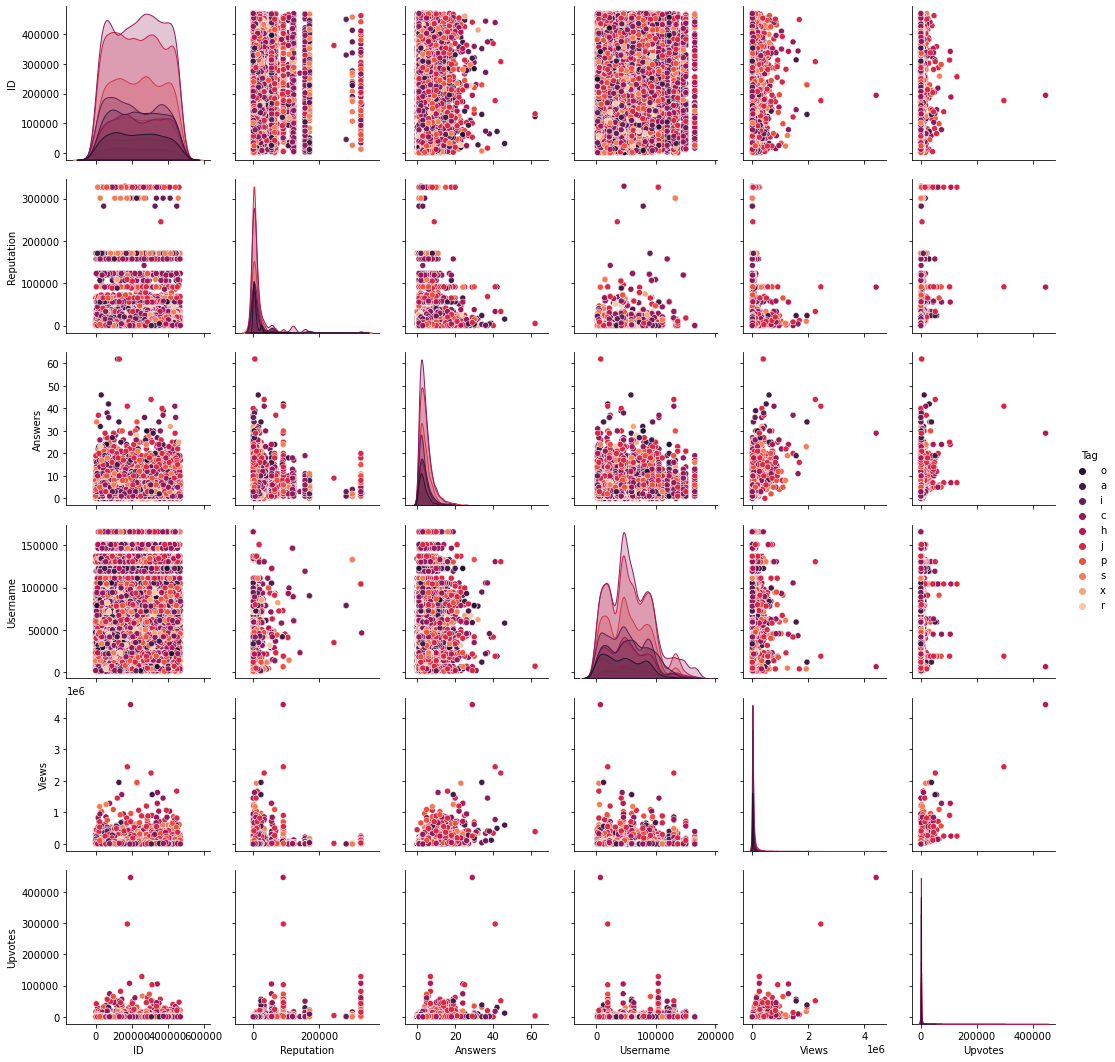

In [6]:
# import seaborn package
import seaborn as sns

# pairplot
sns.pairplot(upvotes, hue = "Tag", palette = "rocket")

# show the plot
plt.show()

Discuss the results:
    The two things that stand out to me in the above plots are the correlations between views & upvotes, and the correlation  between views and answers.  Both instances are positivley correlated.  It seems to me that both views and upvotes increase with the number of answers provided.

#### d. Show the distribution of ‘Views’ and ‘Answers’ according to ‘Tags’ in the barplot. Use matplotlib.pyplot.bar() function. Discuss the result in 1-2 sentences.



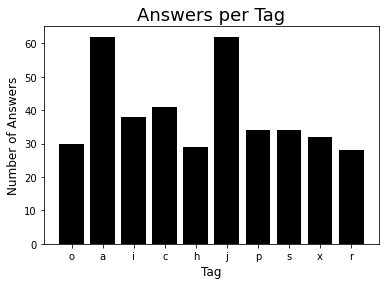

In [7]:
# plot the distribtuion of Answers per Tag
plt.bar(upvotes.Tag, upvotes.Answers, color = 'black')

# label the axes
plt.title('Answers per Tag', fontsize = 18)
plt.xlabel('Tag', fontsize = 12)
plt.ylabel('Number of Answers', fontsize = 12)

# show the bar plot
plt.show()

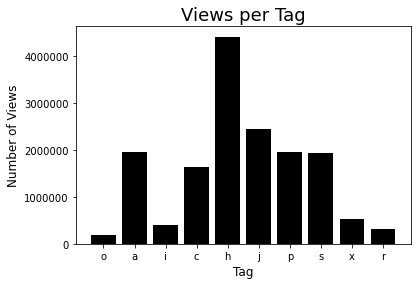

In [8]:
# plot the distribution of Views per Tag
plt.bar(upvotes.Tag, upvotes.Views, color = 'black')

# Label the axes
plt.title("Views per Tag", fontsize = 18)
plt.xlabel('Tag', fontsize = 12)
plt.ylabel('Number of Views', fontsize = 12)

# convert y axis from scientific notation to plain
plt.ticklabel_format(axis = 'y', style = 'plain')

# show the bar plot
plt.show()

Discuss the results:
    Answers per tag are fairly evenly distributed, with a higher concentration of answers in question categories 'a' and 'j'.  Views per tag are concentrated heavily in question category 'h'.  This tells us that viewers are more interested in the types of questions/answers represented by tag 'h'.

#### e. Find an average of the questions are answered.

In [9]:
# get an average of the questions that have been answered
a = upvotes.Answers.mean()

# print the result and round to two decimal places
print('The average number of questions answered is', round(a,2))

The average number of questions answered is 4.24


#### f. Let’s do a feature engineering of Answers variable such that the questions answered on an average less than 4 times will be voted as difficult (1) else easy (0).

In [10]:
# I found that this can be done easily with the following code:
upvotes['Answers'] = (upvotes["Answers"] < 4).astype(int)

# Verify Answers are now 1 or 0
upvotes

# I am not actually sure if this is the best way to do this, but everything else I tried took nearly 10 lines of code.

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
25,412681,o,366.0,1,94185,6152.0,4.0
34,244825,a,56188.0,0,122559,37549.0,2474.0
40,376930,i,65156.0,0,91033,482.0,24.0
61,42012,c,57914.0,0,63016,90861.0,4186.0
79,23155,c,2383.0,1,80714,58584.0,141.0
...,...,...,...,...,...,...,...
329964,131561,h,56188.0,0,122559,23108.0,928.0
329976,23481,p,2801.0,0,47400,111208.0,484.0
330000,207166,c,71.0,1,41953,963.0,10.0
330005,77756,c,6019.0,1,41741,10471.0,77.0



#### g. Scale the variables Reputation, Views, and Answers using z-score normalization.

In [11]:
# apply normalization technique to Reputation
upvotes['Reputation'] = (upvotes['Reputation'] - upvotes['Reputation'].mean()) / upvotes['Reputation'].std()

# apply normalization technique to Views
upvotes['Views'] = (upvotes['Views'] - upvotes['Views'].mean()) / upvotes['Views'].std()

# apply normalization technique to Answers
upvotes['Answers'] = (upvotes['Answers'] - upvotes['Answers'].mean()) / upvotes['Answers'].std()

# display normalized data
upvotes.head()

# I probably should have done this differently?
upvotes

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
25,412681,o,-0.371586,0.919745,94185,-0.306093,4.0
34,244825,a,1.249665,-1.087197,122559,0.034367,2474.0
40,376930,i,1.510125,-1.087197,91033,-0.367576,24.0
61,42012,c,1.299794,-1.087197,63016,0.612467,4186.0
79,23155,c,-0.313005,0.919745,80714,0.262465,141.0
...,...,...,...,...,...,...,...
329964,131561,h,1.249665,-1.087197,122559,-0.122227,928.0
329976,23481,p,-0.300865,-1.087197,47400,0.833104,484.0
330000,207166,c,-0.380153,0.919745,41953,-0.362361,10.0
330005,77756,c,-0.207404,0.919745,41741,-0.259259,77.0


#### h. Convert Tag and Username variables into dummy variables.

In [12]:
# Convert categorical variables to dummy variables and replace
upvotes = pd.get_dummies(upvotes, columns=['Username', 'Tag'])
upvotes

,ID,Reputation,Answers,Views,Upvotes,Username_1407,Username_1843,Username_2177,Username_4118,Username_4618,...,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
25,412681,-0.371586,0.919745,-0.306093,4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
34,244825,1.249665,-1.087197,0.034367,2474.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
40,376930,1.510125,-1.087197,-0.367576,24.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
61,42012,1.299794,-1.087197,0.612467,4186.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
79,23155,-0.313005,0.919745,0.262465,141.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329964,131561,1.249665,-1.087197,-0.122227,928.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
329976,23481,-0.300865,-1.087197,0.833104,484.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
330000,207166,-0.380153,0.919745,-0.362361,10.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
330005,77756,-0.207404,0.919745,-0.259259,77.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


#### i. Partition the data into training and test sets by 75:25 and thereafter apply a linear regression, show RMSE score of testing and training set.

In [13]:
# make output stable/identical at every run
np.random.seed(42)

In [14]:
# import package
from sklearn.model_selection import train_test_split

In [15]:
# outcome variable
upvotes_labels = upvotes["Upvotes"].copy() 

# input variable, drop labels for training set
upvotes_prepared = upvotes.drop("Upvotes", axis=1) 

In [16]:
# train and test splits
x_train, x_test, y_train, y_test = train_test_split(upvotes_prepared,upvotes_labels, test_size=0.25,shuffle = True)

# print train/test 
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(13357, 114) (4453, 114) (13357,) (4453,)


In [17]:
# import package
from sklearn.linear_model import LinearRegression

# train a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [18]:
# print predictions from linear regression
print("Predictions:", lin_reg.predict(x_test))

Predictions: [ -782.38512643  -968.42897907 -1784.54001916 ...  -592.14648719
   142.87311077    27.95133477]


In [19]:
# import package
from sklearn.metrics import mean_squared_error

# measure the regressions RSME on the whole training set
housing_predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2977.346084044885

#### j. Perform only b., h., and i. parts. Discuss the differences in the outcome of i part (RMSE score of training and testing and overall efficiency).

In [20]:
# Perform only parts b., h., and i.

# load the dataset
upvotes = pd.read_csv('upvotes.csv')
upvotes.head()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0


In [21]:
# part b

# drop usernames that appear less than 80 times in the dataset
username_count = upvotes.groupby('Username')['Username'].transform(len)
user = (username_count >= 80)
upvotes = upvotes[user]


# check that they are all greater than or equal to 80

# display Username Value Counts
upvotes.Username.value_counts(ascending = True) 

150637     80
105139     80
40175      80
60830      80
36805      80
         ... 
6697      408
23223     413
45704     483
17878     608
4118      797
Name: Username, Length: 100, dtype: int64

In [22]:
# part h
upvotes = pd.get_dummies(upvotes,columns=['Username', 'Tag'])
upvotes

,ID,Reputation,Answers,Views,Upvotes,Username_1407,Username_1843,Username_2177,Username_4118,Username_4618,...,Tag_a,Tag_c,Tag_h,Tag_i,Tag_j,Tag_o,Tag_p,Tag_r,Tag_s,Tag_x
25,412681,366.0,1.0,6152.0,4.0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
34,244825,56188.0,7.0,37549.0,2474.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
40,376930,65156.0,4.0,482.0,24.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
61,42012,57914.0,5.0,90861.0,4186.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
79,23155,2383.0,2.0,58584.0,141.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329964,131561,56188.0,10.0,23108.0,928.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
329976,23481,2801.0,5.0,111208.0,484.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
330000,207166,71.0,1.0,963.0,10.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
330005,77756,6019.0,1.0,10471.0,77.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [23]:
# part i
upvotes_labels = upvotes["Upvotes"].copy() # outcome variable
upvotes_prepared = upvotes.drop("Upvotes", axis=1) # input variable, drop labels for training set

In [24]:
x_train, x_test, y_train, y_test = train_test_split(upvotes_prepared,upvotes_labels, test_size=0.25,shuffle = True)

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(13357, 114) (4453, 114) (13357,) (4453,)


In [25]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [26]:
print("Predictions:", lin_reg.predict(x_test))

Predictions: [ -512.6038158  -1262.06160651  2172.37751513 ...   212.22761312
 -1132.63657521  -278.46652871]


In [27]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(x_test)
lin_mse = mean_squared_error(y_test, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2663.3495879495867

Discuss the results:
        The second run has a smaller RSME (2663.35 compared to 2977.35).  I would expect the first run to have a better RSME score as the data had been normalized.  Either way, both RSME scores are not great when considering the average number of upvotes in the data is around 330.  This predicition error is not satisfying.

# Problem 3: Health Insurance Cross Sell Prediction(30 points)

##### This exercise is similar to Classifcation model (Lab2 imbalanced data .ipynb on Canvas) with few adjustments and new dataset. I will ask you to manipulate the data in certain ways, run a binary classifier algorithm, and evaluate the model’s performance. Specifically, you will:

#### a. Load the Lab 2 Cross Sell.csv data set.


In [29]:
# common imports
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# change working directory
os.chdir("C:\\Users\gowgi\Desktop\pandas")
os.getcwd()

# load the dataset
cross = pd.read_csv('Lab2_Cross_Sell.csv')

# View dataframe
cross.head()

,Policy_Sales_Channel,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,152.0,279902,Female,27,1,33.0,1,< 1 Year,No,37057.0,268,0
1,152.0,290561,Male,21,1,28.0,1,< 1 Year,No,43013.0,92,0
2,152.0,60089,Male,23,1,41.0,1,< 1 Year,No,47120.0,81,0
3,152.0,50340,Female,23,1,36.0,0,< 1 Year,Yes,38438.0,189,0
4,152.0,210380,Male,32,1,3.0,0,< 1 Year,Yes,69776.0,272,0


#### b. Check missing values and data types.

In [30]:
# Check for missing values and data types
cross.info()

# checking the non-null count, we can see that there are no missing values in the dataset 
# all have 113090 non-null for 113090 entries
# there are 3 categorical variables (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113090 entries, 0 to 113089
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Policy_Sales_Channel  113090 non-null  float64
 1   id                    113090 non-null  int64  
 2   Gender                113090 non-null  object 
 3   Age                   113090 non-null  int64  
 4   Driving_License       113090 non-null  int64  
 5   Region_Code           113090 non-null  float64
 6   Previously_Insured    113090 non-null  int64  
 7   Vehicle_Age           113090 non-null  object 
 8   Vehicle_Damage        113090 non-null  object 
 9   Annual_Premium        113090 non-null  float64
 10  Vintage               113090 non-null  int64  
 11  Response              113090 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 10.4+ MB


#### c. Plot distribution of the categorical and numeric variables.

In [31]:
# import packages
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Policy_Sales_Channel', ylabel='Count'>

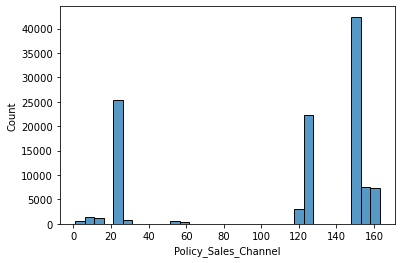

In [32]:
# plot policy sales by channel
sns.histplot(x=cross["Policy_Sales_Channel"])

<AxesSubplot:xlabel='Gender', ylabel='count'>

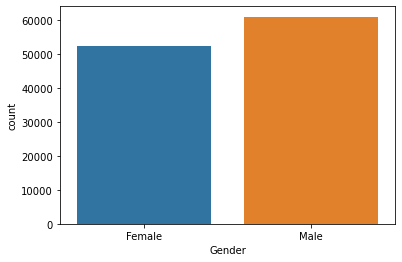

In [33]:
# plot the distribution of policy holders by sex
sns.countplot(x=cross["Gender"])

<AxesSubplot:xlabel='Age', ylabel='Count'>

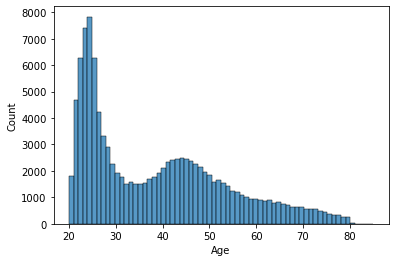

In [34]:
# plot the distribution of policy holders by age
sns.histplot(x=cross["Age"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

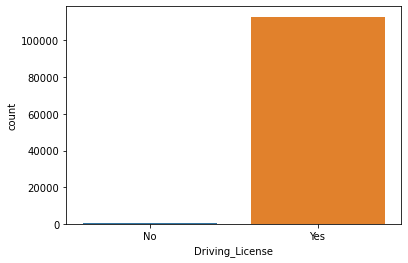

In [35]:
# plot the distribution of policy holders that are licensed drivers 
ax = sns.countplot(x = cross["Driving_License"])
ax.set_xticklabels(["No", "Yes"])

<AxesSubplot:xlabel='Region_Code', ylabel='Count'>

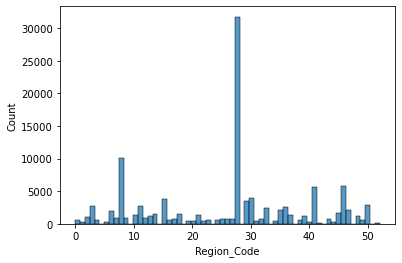

In [36]:
# plot the distribution of policies by region
sns.histplot(x=cross["Region_Code"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

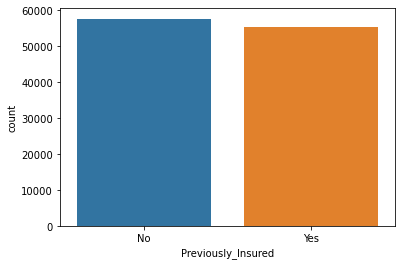

In [37]:
# plot the distribtion of previously insured individuals
ax = sns.countplot(x= cross["Previously_Insured"])
ax.set_xticklabels(["No", "Yes"])

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

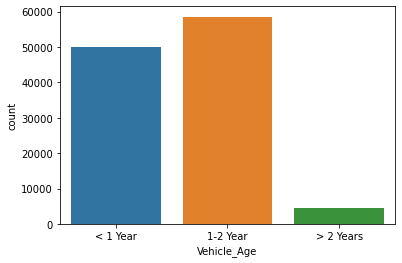

In [38]:
# plot the distribution of the age of vehicles
sns.countplot(x=cross["Vehicle_Age"])

<AxesSubplot:xlabel='Vehicle_Damage', ylabel='count'>

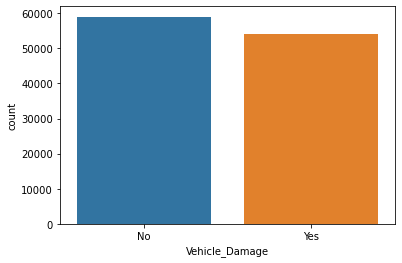

In [39]:
# plot the distribution of vehicle damage
sns.countplot(x = cross["Vehicle_Damage"])

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

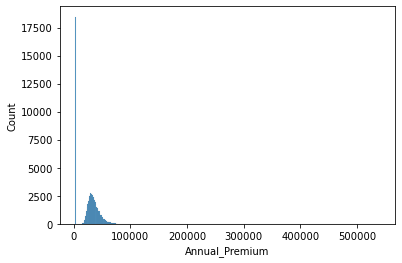

In [40]:
# plot the distribution of policy holder's annual premiums
sns.histplot(x=cross["Annual_Premium"])

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

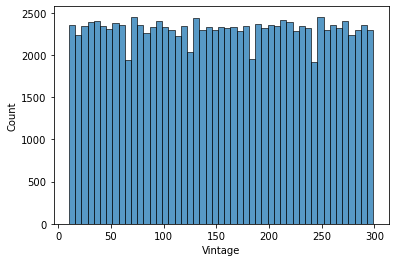

In [41]:
# plot the distribution of vintage
# what is vintage in this case? 
# I thought it was policy holders with vintage cars, but looking at the data, that is not the case
sns.histplot(x = cross["Vintage"])

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

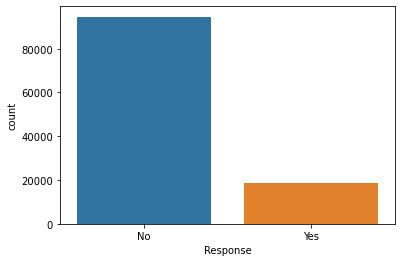

In [42]:
# plot the distribution of repsonses from policy holders
ax = sns.countplot(x = cross["Response"])
ax.set_xticklabels(["No", "Yes"])

#### d. Convert categorical variables into dummy variables.

In [43]:
# Convert Gender to dummy variable
cross1 = pd.get_dummies(cross.Gender, prefix='', prefix_sep='').loc[:, 'Male':]
cross1.head()

,Male
0,0
1,1
2,1
3,0
4,1


In [44]:
# Concatenate the gender dummy variables and dataframe
cross = cross.reset_index(drop=True)
cross_prepared = pd.concat([cross.drop('Gender', axis = 1), cross1], axis=1)

# view output
cross_prepared 

# Gender column is gone and now there is only ONE column for sex (if male: Male = 1, else = 0)

,Policy_Sales_Channel,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Male
0,152.0,279902,27,1,33.0,1,< 1 Year,No,37057.0,268,0,0
1,152.0,290561,21,1,28.0,1,< 1 Year,No,43013.0,92,0,1
2,152.0,60089,23,1,41.0,1,< 1 Year,No,47120.0,81,0,1
3,152.0,50340,23,1,36.0,0,< 1 Year,Yes,38438.0,189,0,0
4,152.0,210380,32,1,3.0,0,< 1 Year,Yes,69776.0,272,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113085,10.0,230934,73,1,35.0,0,1-2 Year,Yes,24667.0,177,0,0
113086,10.0,337362,71,1,35.0,0,1-2 Year,Yes,29852.0,273,0,1
113087,10.0,312995,74,1,35.0,0,1-2 Year,No,36938.0,236,0,0
113088,10.0,380442,37,1,35.0,0,1-2 Year,Yes,32568.0,254,0,0


In [45]:
# Convert vehicle damage to dummy variable
cross2 = pd.get_dummies(cross_prepared.Vehicle_Damage, prefix='Vehicle_Damage').loc[:, 'Vehicle_Damage_Yes':]
cross2.head()

,Vehicle_Damage_Yes
0,0
1,0
2,0
3,1
4,1


In [46]:
# Concatenate the damage dummy variables and dataframe
crosss_prepared = cross_prepared.reset_index(drop=True)
cross3 = pd.concat([cross_prepared.drop('Vehicle_Damage', axis = 1), cross2], axis=1)

# view output
cross3

# Vehicle_Damage column is gone and now there is only ONE column for damage (if damage: Vehicle_Damage_Yes = 1, else = 0)

,Policy_Sales_Channel,id,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Vintage,Response,Male,Vehicle_Damage_Yes
0,152.0,279902,27,1,33.0,1,< 1 Year,37057.0,268,0,0,0
1,152.0,290561,21,1,28.0,1,< 1 Year,43013.0,92,0,1,0
2,152.0,60089,23,1,41.0,1,< 1 Year,47120.0,81,0,1,0
3,152.0,50340,23,1,36.0,0,< 1 Year,38438.0,189,0,0,1
4,152.0,210380,32,1,3.0,0,< 1 Year,69776.0,272,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
113085,10.0,230934,73,1,35.0,0,1-2 Year,24667.0,177,0,0,1
113086,10.0,337362,71,1,35.0,0,1-2 Year,29852.0,273,0,1,1
113087,10.0,312995,74,1,35.0,0,1-2 Year,36938.0,236,0,0,0
113088,10.0,380442,37,1,35.0,0,1-2 Year,32568.0,254,0,0,1


In [47]:
# create dummy variables for the age of the car
cross3 = pd.get_dummies(cross3, columns = ['Vehicle_Age'],
                      prefix = '', prefix_sep='')

# view output
cross3

# Original column 'Vehicle_Age' replaced
# Three new columns were formed:  '1-2 Year', '< 1 Year', and '> 2 Years'
# 1 if True, 0 if false

,Policy_Sales_Channel,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,Male,Vehicle_Damage_Yes,1-2 Year,< 1 Year,> 2 Years
0,152.0,279902,27,1,33.0,1,37057.0,268,0,0,0,0,1,0
1,152.0,290561,21,1,28.0,1,43013.0,92,0,1,0,0,1,0
2,152.0,60089,23,1,41.0,1,47120.0,81,0,1,0,0,1,0
3,152.0,50340,23,1,36.0,0,38438.0,189,0,0,1,0,1,0
4,152.0,210380,32,1,3.0,0,69776.0,272,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113085,10.0,230934,73,1,35.0,0,24667.0,177,0,0,1,1,0,0
113086,10.0,337362,71,1,35.0,0,29852.0,273,0,1,1,1,0,0
113087,10.0,312995,74,1,35.0,0,36938.0,236,0,0,0,1,0,0
113088,10.0,380442,37,1,35.0,0,32568.0,254,0,0,1,1,0,0


#### e. Perform cross validation techniques with Logistic Regression as an estimator, 5 folds splitting, and show accuracy scores. Discuss the results.

In [48]:
# make output stable/identical at every run
np.random.seed(42)

In [49]:
# Define dependent and independent variables
cross_train_feature = cross3.drop("Previously_Insured", axis=1) # input variable, drop labels for training set 
cross_labels = cross3["Previously_Insured"].copy() # outcome variable

In [50]:
# Define the model
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()

In [51]:
# import package
from sklearn.model_selection import cross_val_score

# Use the cross_val_score() function to evaluate Logistic Regression model using K-fold cross-validation, with 5 folds.
cross_val_score(logistic_regression, cross_train_feature, cross_labels, scoring = 'accuracy', cv = 5)

array([0.59434963, 0.64400035, 0.78959236, 0.28676276, 0.54845698])

Discuss the results:
    There is a large disparity in accuracy results between each cross-validation fold and they are alarmingly low.  They range from having an accuracy of 28.7% to 79%.  On average, this model will be correct about 58% of the time.  Looking at the data however, we can see that about 58% of the policy holders have insurance, so if we were to always guess that one would get insurance, we would be correct 58% of the time.  This is why accuracy is not the preferred method, generally.

#### f. Show Confusion Matrix, Precision and Recall. Discuss the results.

In [52]:
# import package
from sklearn.model_selection import cross_val_predict

# set up predictions to be compared against actual targets
y_train_pred = cross_val_predict(logistic_regression, cross_train_feature, cross_labels, cv = 5)

In [53]:
# import package
from sklearn.metrics import confusion_matrix

# confusion matrix
confusion_matrix(cross_labels, y_train_pred)

array([[28328, 29299],
       [19032, 36431]], dtype=int64)

This confusion matrix tells us this:

    The first row tells us about the people that will not buy insurance:
        28,328 True Negatives:  individuals that were predicted to not get insurance that did not get insurance.
        29,299 False Positives:  individuals that were predicted to get insurance that did not actually get insurance.
    
    The second row tells us about people that will buy the insurance.  
        19,031 False Negatives:  People predicted to not buy insurance that actually got insurance.
        36,432 True Positives:  People predicted to purchase insurance that actually purchased insurance.

In [54]:
# import package
from sklearn.metrics import precision_score, recall_score

In [55]:
# compute precision score
precision_score(cross_labels, y_train_pred)

0.5542522440286018

In [56]:
# compute recall score
recall_score(cross_labels, y_train_pred)

0.6568523159583867

Discuss the results:
    Precision Score:  This measures the accuracy of positive predictions.  When the model claims that an individual will buy insurance, it will be correct 55.4% of the time. 
    Recall Score:  This measures the ratio of positive instances that are correctly detected.  The model correctly detected only 65.7% of individuals that bought insurance.

#### g. Plot Precision vs Recall Curve and ROC curve. Find AUC score. Discuss the results.

In [57]:
# return probability values
y_scores =  cross_val_predict(logistic_regression, cross_train_feature, cross_labels, cv = 5, method = 'predict_proba')[:,1] 

In [58]:
# import package
from sklearn.metrics import precision_recall_curve

# compute precision and recall for all thresholds
precisions, recalls, thresholds = precision_recall_curve(cross_labels, y_scores)

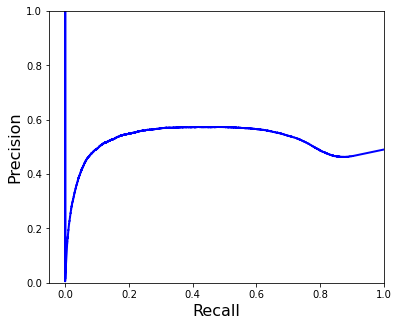

In [59]:
# plot the results
from matplotlib import pyplot as plt
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([-0.05, 1, 0, 1])

plt.figure(figsize=(6, 5))
plot_precision_vs_recall(precisions, recalls)

plt.show()

Discuss the results:
    When graphing the precision recall curve, we expect to see a trade-off.  If we want higher precision, inevitably we will get a lower recall.  This graph looks weird though.  I have no explanation for this...

In [60]:
# import package
from sklearn.metrics import roc_curve

# compute thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(cross_labels, y_scores)

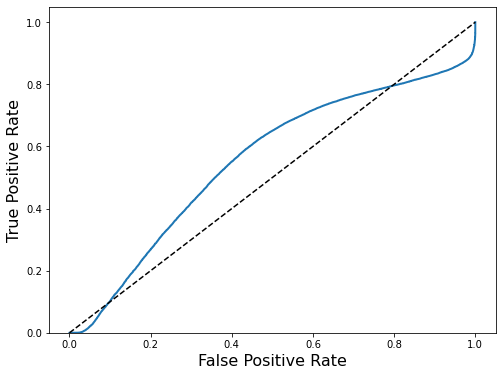

In [61]:
# plot the ROC curve
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.05, 1.05, 0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)

plt.show()

Discuss the results:
    We would expect to see a trade off here as well.  With a higher TPR, the classifier will produce more FPR.  For a classifier to be good, it needs to stay away from the dotted line (a purely random classifier).  This one crosses it...

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(cross_labels, y_scores)

0.5537100139145732

Discuss the results:
    A perfect classifier would have an area under the curve of 1.  This ROC AUC score tells us that the result is a purely random classifier and not a good classifier.

#### h. Fine-tune your model with Grid Search Method with the same parameters that we did in the class.  Show the outputs.


In [63]:
# using gridsearch to experiment with hyperparameters
from sklearn.model_selection import GridSearchCV
logistic_regression = LogisticRegression()
parameters_lg = {'solver': ['newton-cg', 'lbfgs', 'liblinear'],
                 'penalty': ['l2'],
                 'C': [10, 1.0, 0.1]}
                   
# with GridSearch
grid_search_lg= GridSearchCV( logistic_regression,
                               param_grid=parameters_lg,
                               scoring = 'roc_auc',
                               n_jobs = -1,
                               cv = 5)
grid_search_lg.fit(cross_train_feature, cross_labels)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [10, 1.0, 0.1], 'penalty': ['l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='roc_auc')

In [64]:
# print the best score 
print("Best Score:", str(grid_search_lg.best_score_))

Best Score: 0.937936289012206
